In [1]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

Using TensorFlow backend.



Epoch 00001: val_loss improved from inf to 0.15472, saving model to ./model/01-0.1547.hdf5

Epoch 00002: val_loss improved from 0.15472 to 0.10425, saving model to ./model/02-0.1043.hdf5

Epoch 00003: val_loss improved from 0.10425 to 0.08501, saving model to ./model/03-0.0850.hdf5

Epoch 00004: val_loss improved from 0.08501 to 0.07733, saving model to ./model/04-0.0773.hdf5

Epoch 00005: val_loss improved from 0.07733 to 0.06832, saving model to ./model/05-0.0683.hdf5

Epoch 00006: val_loss improved from 0.06832 to 0.06149, saving model to ./model/06-0.0615.hdf5

Epoch 00007: val_loss did not improve from 0.06149

Epoch 00008: val_loss improved from 0.06149 to 0.06008, saving model to ./model/08-0.0601.hdf5

Epoch 00009: val_loss improved from 0.06008 to 0.05800, saving model to ./model/09-0.0580.hdf5

Epoch 00010: val_loss did not improve from 0.05800

Epoch 00011: val_loss did not improve from 0.05800

Epoch 00012: val_loss did not improve from 0.05800

Epoch 00013: val_loss did n

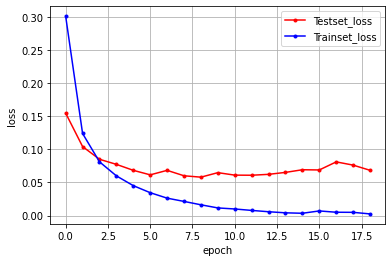

In [2]:
# 모델 프레임 설정
# 입력값 784개, 은닉층 512개, 출력 10개인 모델
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정(오차함수, 최적화 함수 설정)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10) # 10회 이상 모델의 성과 향상이 없으면 학습 중단

# 모델의 실행(샘플 200개를 모두 30번 실행)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
